# Dataset

In [1]:
from datasets import load_dataset
from datasets import load_dataset_builder
from datasets import get_dataset_split_names
from datasets import Dataset
from PIL import Image

In [2]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [4]:
from datasets import load_dataset
ds = load_dataset("keremberke/pokemon-classification", name="full")

Found cached dataset pokemon-classification (/home/victor/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
example = ds['train'][0]
example

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/ddf83709112857bf2f6b4ee5ec4c42cc76c9bc0e000f7979b88cff71ac71f111/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57}

In [6]:
type(example)

dict

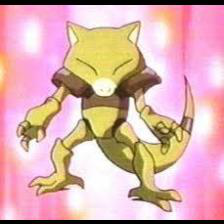

In [7]:
example['image']

In [8]:
example

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/ddf83709112857bf2f6b4ee5ec4c42cc76c9bc0e000f7979b88cff71ac71f111/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57}

In [9]:
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})

In [10]:
ds_builder = load_dataset_builder("keremberke/pokemon-classification", "full")

In [11]:
ds_builder.info.features

{'image_file_path': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None),
 'labels': ClassLabel(names=['Porygon', 'Goldeen', 'Hitmonlee', 'Hitmonchan', 'Gloom', 'Aerodactyl', 'Mankey', 'Seadra', 'Gengar', 'Venonat', 'Articuno', 'Seaking', 'Dugtrio', 'Machop', 'Jynx', 'Oddish', 'Dodrio', 'Dragonair', 'Weedle', 'Golduck', 'Flareon', 'Krabby', 'Parasect', 'Ninetales', 'Nidoqueen', 'Kabutops', 'Drowzee', 'Caterpie', 'Jigglypuff', 'Machamp', 'Clefairy', 'Kangaskhan', 'Dragonite', 'Weepinbell', 'Fearow', 'Bellsprout', 'Grimer', 'Nidorina', 'Staryu', 'Horsea', 'Electabuzz', 'Dratini', 'Machoke', 'Magnemite', 'Squirtle', 'Gyarados', 'Pidgeot', 'Bulbasaur', 'Nidoking', 'Golem', 'Dewgong', 'Moltres', 'Zapdos', 'Poliwrath', 'Vulpix', 'Beedrill', 'Charmander', 'Abra', 'Zubat', 'Golbat', 'Wigglytuff', 'Charizard', 'Slowpoke', 'Poliwag', 'Tentacruel', 'Rhyhorn', 'Onix', 'Butterfree', 'Exeggcute', 'Sandslash', 'Pinsir', 'Rattata', 'Growlithe', 'Haunter', 'Pidgey', 'Ditto', 'Farfetchd

In [12]:
ds_builder.info.features['labels'].names[57]

'Abra'

In [13]:
get_dataset_split_names("keremberke/pokemon-classification", "full")

['train', 'validation', 'test']

In [24]:
ds['train']['labels'][:10]

[57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

## Dataset Preprocess

### ControlNet Fill50k

In [27]:
fill50k_ds = load_dataset("fusing/fill50k")

No config specified, defaulting to: fill50k/default
Found cached dataset fill50k (/home/victor/.cache/huggingface/datasets/fusing___fill50k/default/0.0.2/f23b778406682a796a540934e7163495e1b8a88fefc76ca08f7e5a79ddcd668b)


  0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
fill50k_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 50000
    })
})

In [30]:
fill50k_ds['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'conditioning_image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'text': 'pale golden rod circle with old lace background'}

# Prepare Pokemon Dataset

In [31]:
ds = load_dataset("keremberke/pokemon-classification", name="full")
ds

Found cached dataset pokemon-classification (/home/victor/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})

In [32]:
ds_builder = load_dataset_builder("keremberke/pokemon-classification", "full")
pk_labels = ds_builder.info.features['labels'].names

In [35]:
# Get named labels
pk_i2label = {i: pk_labels[i] for i in range(len(pk_labels))}
pk_i2label

{0: 'Porygon',
 1: 'Goldeen',
 2: 'Hitmonlee',
 3: 'Hitmonchan',
 4: 'Gloom',
 5: 'Aerodactyl',
 6: 'Mankey',
 7: 'Seadra',
 8: 'Gengar',
 9: 'Venonat',
 10: 'Articuno',
 11: 'Seaking',
 12: 'Dugtrio',
 13: 'Machop',
 14: 'Jynx',
 15: 'Oddish',
 16: 'Dodrio',
 17: 'Dragonair',
 18: 'Weedle',
 19: 'Golduck',
 20: 'Flareon',
 21: 'Krabby',
 22: 'Parasect',
 23: 'Ninetales',
 24: 'Nidoqueen',
 25: 'Kabutops',
 26: 'Drowzee',
 27: 'Caterpie',
 28: 'Jigglypuff',
 29: 'Machamp',
 30: 'Clefairy',
 31: 'Kangaskhan',
 32: 'Dragonite',
 33: 'Weepinbell',
 34: 'Fearow',
 35: 'Bellsprout',
 36: 'Grimer',
 37: 'Nidorina',
 38: 'Staryu',
 39: 'Horsea',
 40: 'Electabuzz',
 41: 'Dratini',
 42: 'Machoke',
 43: 'Magnemite',
 44: 'Squirtle',
 45: 'Gyarados',
 46: 'Pidgeot',
 47: 'Bulbasaur',
 48: 'Nidoking',
 49: 'Golem',
 50: 'Dewgong',
 51: 'Moltres',
 52: 'Zapdos',
 53: 'Poliwrath',
 54: 'Vulpix',
 55: 'Beedrill',
 56: 'Charmander',
 57: 'Abra',
 58: 'Zubat',
 59: 'Golbat',
 60: 'Wigglytuff',
 61: 'Ch

In [36]:
ds['train'][0]

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/ddf83709112857bf2f6b4ee5ec4c42cc76c9bc0e000f7979b88cff71ac71f111/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57}

In [62]:
# Group images by labels
from collections import defaultdict

images_by_label = defaultdict(list)
image_paths_by_label = defaultdict(list)
for s in ['train', 'validation']:
    for d in ds[s]:
        label = pk_i2label[d['labels']].lower()
        images_by_label[label].append(d['image'])
        image_paths_by_label[label].append(d['image_file_path'])
    

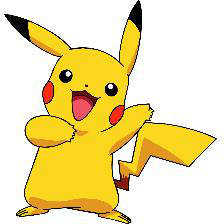

In [63]:
images_by_label['pikachu'][1]

In [64]:
fill50k_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 50000
    })
})

In [65]:
def gen_pk_data():
    for label, imgs in images_by_label.items():
        c_img = imgs[0]
        for im in imgs:
            yield {'image': im, 'conditioning_image': c_img, 'text': ''}

In [66]:
a = list(gen_pk_data())
len(a)

6259

In [67]:
a[500]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'conditioning_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'text': ''}

In [68]:
fill50k_ds['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'conditioning_image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'text': 'pale golden rod circle with old lace background'}

In [69]:
pk_dataset = Dataset.from_generator(gen_pk_data)

Found cached dataset generator (/home/victor/.cache/huggingface/datasets/generator/default-2d9ff5d9d41cf442/0.0.0)


In [70]:
pk_dataset

Dataset({
    features: ['image', 'conditioning_image', 'text'],
    num_rows: 6259
})

In [71]:
pk_dataset = pk_dataset.train_test_split(test_size=0.01)
pk_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 6196
    })
    test: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 63
    })
})

In [73]:
pk_dataset.save_to_disk("./pokemon_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/6196 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/63 [00:00<?, ? examples/s]

In [74]:
!ls ./pokemon_dataset

dataset_dict.json  test/  train/


In [75]:
from datasets import load_from_disk

reloaded_pk_dataset = load_from_disk("./pokemon_dataset")
reloaded_pk_dataset                            


DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 6196
    })
    test: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 63
    })
})

In [76]:
reloaded_pk_dataset['train'][500]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'conditioning_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'text': ''}

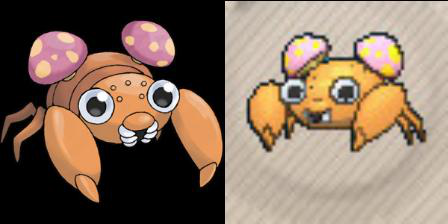

In [77]:
image_grid([reloaded_pk_dataset['train'][500]['conditioning_image'],
            reloaded_pk_dataset['train'][500]['image']],
           1, 2)

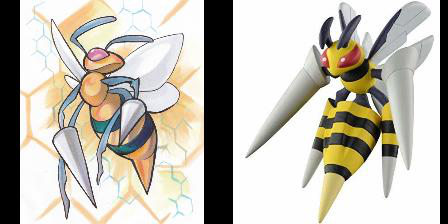

In [78]:
image_grid([reloaded_pk_dataset['train'][0]['conditioning_image'],
            reloaded_pk_dataset['train'][0]['image']],
           1, 2)

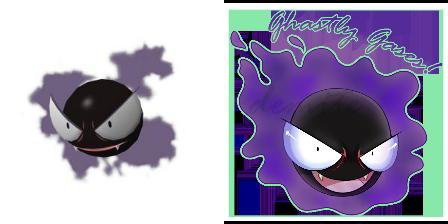

In [79]:
image_grid([reloaded_pk_dataset['train'][502]['conditioning_image'],
            reloaded_pk_dataset['train'][502]['image']],
           1, 2)

## Captions

In [306]:
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to("cuda")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
# >>> a photography of a woman and her dog

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/home/victor/miniconda3/envs/ctrl_net/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach
a woman sitting on the beach with her dog


# Training ControlNet

In [60]:
ds['test'][0]

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/1115f34ff9884a6ab3ceaafa87a0dfd4_jpg.rf.8d4fee20d6a1f27951df8c2db027356a.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 127}

In [61]:
ds['test'][1]

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/601729d8dcd84c688d51072821a7dc8b_jpg.rf.7f1ca2e969f46e11c6eb2b2a22ae7c35.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 127}

Command to run:

```bash
$ export MODEL_DIR="runwayml/stable-diffusion-v1-5"
export OUTPUT_DIR="pokemon_models"

$ accelerate launch --mixed_precision="fp16" --multi_gpu train_controlnet.py \
      --pretrained_model_name_or_path=$MODEL_DIR \
      --output_dir=$OUTPUT_DIR \
      --train_data_dir=/home/victor/Workspace/diffusers/examples/controlnet/pokemon_dataset \
      --resolution=224 \
      --learning_rate=1e-5 \
      --validation_image "/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/1115f34ff9884a6ab3ceaafa87a0dfd4_jpg.rf.8d4fee20d6a1f27951df8c2db027356a.jpg" \
                         "/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/601729d8dcd84c688d51072821a7dc8b_jpg.rf.7f1ca2e969f46e11c6eb2b2a22ae7c35.jpg" \
      --validation_prompt "" "" \
      --train_batch_size=4 \
      --mixed_precision="fp16" \
      --tracker_project_name="controlnet-pokemon" \
      --report_to=wandb \
      --num_train_epochs=4
```

Also, need to changes to train_controlnet.py to load dataset from local dir:

```
$ git diff train_controlnet.py                          (ctrl_net)
diff --git a/examples/controlnet/train_controlnet.py b/examples/controlnet/train_controlnet.py
index 9754c25b..f13d5b38 100644
diff --git a/examples/controlnet/train_controlnet.py b/examples/controlnet/train_controlnet.py
index 9754c25b..f13d5b38 100644
--- a/examples/controlnet/train_controlnet.py
+++ b/examples/controlnet/train_controlnet.py
@@ -30,6 +30,7 @@ from accelerate import Accelerator
 from accelerate.logging import get_logger
 from accelerate.utils import ProjectConfiguration, set_seed
 from datasets import load_dataset
+from datasets import load_from_disk
 from huggingface_hub import create_repo, upload_folder
 from packaging import version
 from PIL import Image
@@ -597,9 +598,12 @@ def make_train_dataset(args, tokenizer, accelerator):
         )
     else:
         if args.train_data_dir is not None:
-            dataset = load_dataset(
+            #dataset = load_dataset(
+            #    args.train_data_dir,
+            #    cache_dir=args.cache_dir,
+            #)
+            dataset = load_from_disk(
                 args.train_data_dir,
-                cache_dir=args.cache_dir,
             )
         # See more about loading custom images at
```


# Inference

In [80]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

In [81]:
base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_path = '/home/victor/Workspace/diffusers/examples/controlnet/pokemon_models/checkpoint-4500/controlnet'

controlnet = ControlNetModel.from_pretrained(controlnet_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()

control_image = load_image("./conditioning_image_1.png")
prompt = "pale golden rod circle with old lace background"

# generate image
generator = torch.manual_seed(0)

/home/victor/miniconda3/envs/ctrl_net/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


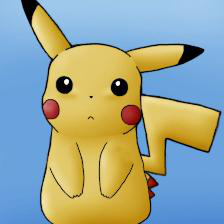

In [82]:
image_paths_by_label['pikachu'][0]
images_by_label['pikachu'][0]

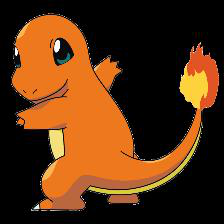

In [106]:
control_image = load_image(image_paths_by_label['charmander'][0])
prompt = "cat"
control_image

  0%|          | 0/40 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


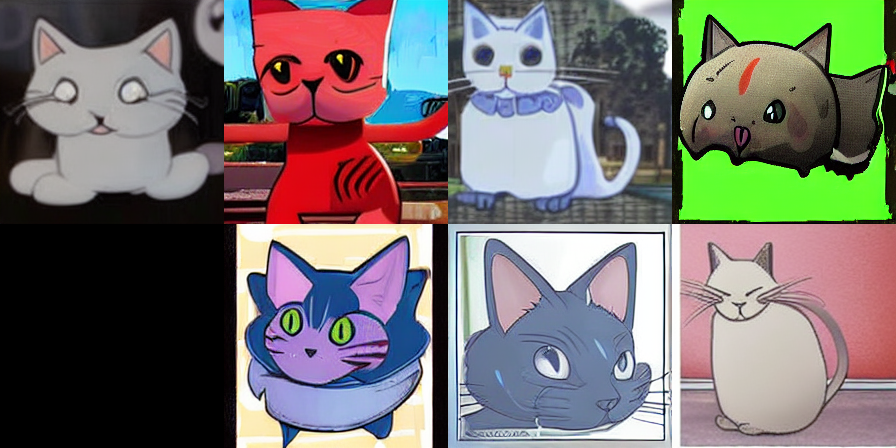

In [107]:
images = pipe(
     prompt, num_inference_steps=40, generator=generator, image=control_image, num_images_per_prompt=8
).images

image_grid(images, 2, 4)